In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [17]:
def bench(n, d=1):
    res = !g++ -O3 -march=native -D N={n} -D D={d} inc.cc -o run && ./run
    res = float(res[0].split()[0])
    print(n, d, res)
    return res

ns = list(int(1.17**k) for k in range(50, 100))

l = [bench(n) for n in ns]

#bench(2**15)
#bench(2**23)

2566 1 25.28
3002 1 26.72
3512 1 26.35
4110 1 27.1
4808 1 26.49
5626 1 28.25
6582 1 29.94
7701 1 28.62
9011 1 24.77
10543 1 25.15
12335 1 25.77
14432 1 24.98
16885 1 25.26
19756 1 25.65
23115 1 25.9
27044 1 25.35
31642 1 25.54
37021 1 26.18
43315 1 24.85
50678 1 26.41
59293 1 26.33
69373 1 26.11
81167 1 25.37
94965 1 24.97
111110 1 24.96
129998 1 23.63
152098 1 22.31
177955 1 22.3
208207 1 21.23
243603 1 20.75
285015 1 19.64
333468 1 19.54
390158 1 19.52
456485 1 18.37
534087 1 17.12
624882 1 14.5
731112 1 11.59
855401 1 7.27
1000819 1 5.34
1170959 1 3.23
1370022 1 2.88
1602925 1 2.09
1875423 1 2.19
2194245 1 2.11
2567266 1 2.22
3003702 1 2.15
3514331 1 2.17
4111767 1 2.35
4810768 1 2.11
5628599 1 2.14


In [23]:
plt.xlabel('Array size')
plt.ylabel('GFLOPS')

plt.plot(ns, l, color='darkred')

lines = [
    (2**13, "32KB"),
    (2**17, "512KB"),
    (2**21, "8MB"),
]

for x, t in lines:
    plt.text(x * 1.2, 10, t)
    plt.axvline(x=x, color='black', linestyle='--')

plt.xscale('log', basex=2)

#plt.title("for(int i = 0; i < n; i++) a[i]++")

#plt.show()
plt.savefig("inc.svg")

In [24]:
ns = list(int(1.17**k) for k in range(50, 100))

l2 = [bench(n, 16) for n in ns]

2566 16 44.26
3002 16 46.46
3512 16 52.55
4110 16 54.61
4808 16 53.07
5626 16 57.21
6582 16 54.02
7701 16 54.85
9011 16 27.2
10543 16 30.52
12335 16 30.95
14432 16 29.89
16885 16 30.76
19756 16 30.1
23115 16 30.95
27044 16 31.43
31642 16 31.87
37021 16 31.58
43315 16 32.62
50678 16 31.01
59293 16 29.11
69373 16 30.63
81167 16 31.64
94965 16 29.98
111110 16 30.45
129998 16 27.56
152098 16 24.72
177955 16 23.7
208207 16 22.52
243603 16 22.28
285015 16 20.21
333468 16 20.84
390158 16 19.46
456485 16 19.39
534087 16 18.2
624882 16 16.85
731112 16 13.87
855401 16 10.38
1000819 16 5.51
1170959 16 3.17
1370022 16 2.39
1602925 16 2.2
1875423 16 2.07
2194245 16 1.99
2567266 16 1.83
3003702 16 2.0
3514331 16 1.81
4111767 16 1.88
4810768 16 1.84
5628599 16 2.05


In [27]:
ns = list(int(1.17**k) for k in range(50, 100))
l3 = [bench(n, 8) for n in ns]

2566 8 26.68
3002 8 26.38
3512 8 28.39
4110 8 28.09
4808 8 27.99
5626 8 28.71
6582 8 29.61
7701 8 29.34
9011 8 28.13
10543 8 24.69
12335 8 25.61
14432 8 25.05
16885 8 26.01
19756 8 25.55
23115 8 26.01
27044 8 25.93
31642 8 26.93
37021 8 26.16
43315 8 24.35
50678 8 27.42
59293 8 26.26
69373 8 24.56
81167 8 25.78
94965 8 24.68
111110 8 25.23
129998 8 23.69
152098 8 21.8
177955 8 21.58
208207 8 21.44
243603 8 19.69
285015 8 18.8
333468 8 18.62
390158 8 18.53
456485 8 19.3
534087 8 18.2
624882 8 15.85
731112 8 13.92
855401 8 9.01
1000819 8 3.76
1170959 8 3.04
1370022 8 2.37
1602925 8 2.33
1875423 8 2.22
2194245 8 2.21
2567266 8 2.23
3003702 8 2.04
3514331 8 1.93
4111767 8 2.17
4810768 8 1.99
5628599 8 2.03


In [36]:
plt.xlabel('Array size')

plt.plot(ns, l, color='darkred', label='step = 1')
plt.plot(ns, l2, color='darkblue', label='step = 16')

lines = [
    (2**13, "32KB"),
    (2**17, "512KB"),
    (2**21, "8MB"),
]

for x, t in lines:
    plt.text(x * 1.2, 10, t)
    plt.axvline(x=x, color='black', linestyle='--')

plt.xscale('log', basex=2)
plt.legend(loc='best')

#plt.show()
plt.savefig("strided.svg")

In [51]:
plt.xlabel('Array size')

plt.plot(ns, l, color='darkred', label='step = 1')
plt.plot(ns, l3, color='darkgreen', label='step = 8')
plt.plot(ns, l2, color='darkblue', label='step = 16')

lines = [
    (2**13, "32KB"),
    (2**17, "512KB"),
    (2**21, "8MB"),
]

for x, t in lines:
    plt.text(x * 1.2, 10, t)
    plt.axvline(x=x, color='black', linestyle='--')

plt.xscale('log', basex=2)
plt.legend(loc='best')

#plt.show()
plt.savefig("strided2.svg")

In [177]:
ds = list(range(1, 1000))
#ns = list(int(1.17**k) for k in range(40, 100))

l4 = [bench(2**22, d) for d in ds]

1048576 1 10.41
1048576 2 0.96
1048576 3 0.87
1048576 4 0.67
1048576 5 1.84
1048576 6 1.65
1048576 7 1.19
1048576 8 1.06
1048576 9 1.03
1048576 10 0.93
1048576 11 0.81
1048576 12 0.73
1048576 13 0.66
1048576 14 0.59
1048576 15 0.57
1048576 16 0.49
1048576 17 0.53
1048576 18 0.59
1048576 19 0.68
1048576 20 0.74
1048576 21 0.79
1048576 22 0.65
1048576 23 1.1
1048576 24 1.15
1048576 25 1.17
1048576 26 1.12
1048576 27 1.33
1048576 28 1.24
1048576 29 1.48
1048576 30 1.4
1048576 31 1.44
1048576 32 0.65
1048576 33 1.76
1048576 34 1.6
1048576 35 2.02
1048576 36 1.9
1048576 37 2.08
1048576 38 2.28
1048576 39 2.27
1048576 40 2.22
1048576 41 2.39
1048576 42 2.38
1048576 43 2.84
1048576 44 2.59
1048576 45 2.57
1048576 46 2.81
1048576 47 3.09
1048576 48 2.97
1048576 49 2.8
1048576 50 2.56
1048576 51 3.06
1048576 52 3.38
1048576 53 2.88
1048576 54 2.94
1048576 55 2.89
1048576 56 3.13
1048576 57 2.85
1048576 58 2.73
1048576 59 2.74
1048576 60 3.43
1048576 61 2.8
1048576 62 2.97
1048576 63 3.24
104857

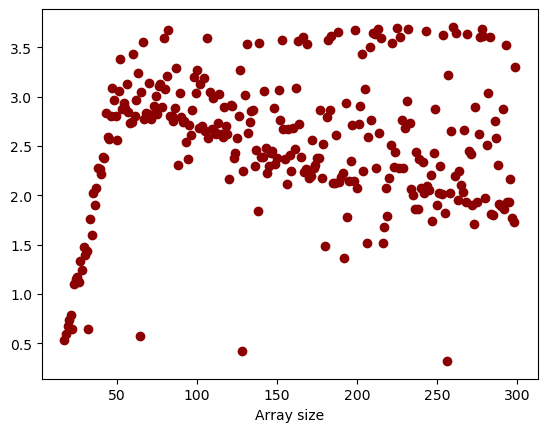

In [182]:
sns.reset_defaults()

plt.xlabel('Stride')

plt.scatter(ds[16:], l3[16:], color='darkred')

#plt.xscale('log', basex=2)

plt.show()
#plt.savefig("strided.svg")

In [176]:
bench(2**20, 65)

1048576 65 3.24


3.24

In [46]:
def bench2(n):
    res = !g++ -O3 -march=native -D N={n} permutation.cc -o run && ./run
    res = float(res[0].split()[0])
    print(n, res)
    return res

bench2(2**24)

16777216 1.99


1.99

In [47]:
ns = list(int(1.17**k) for k in range(50, 100))
p = [bench2(n) for n in ns]

2566 25.91
3002 25.34
3512 27.83
4110 27.2
4808 28.87
5626 28.27
6582 29.32
7701 27.24
9011 24.6
10543 24.73
12335 24.97
14432 25.37
16885 26.09
19756 26.14
23115 25.71
27044 25.72
31642 25.52
37021 26.48
43315 25.65
50678 26.53
59293 21.19
69373 24.81
81167 25.07
94965 24.24
111110 25.14
129998 23.15
152098 20.18
177955 20.78
208207 20.99
243603 20.2
285015 18.75
333468 18.63
390158 16.83
456485 17.92
534087 17.38
624882 14.95
731112 11.09
855401 6.66
1000819 3.73
1170959 2.05
1370022 1.75
1602925 1.84
1875423 1.78
2194245 1.86
2567266 1.78
3003702 1.83
3514331 1.75
4111767 1.94
4810768 1.96
5628599 2.04


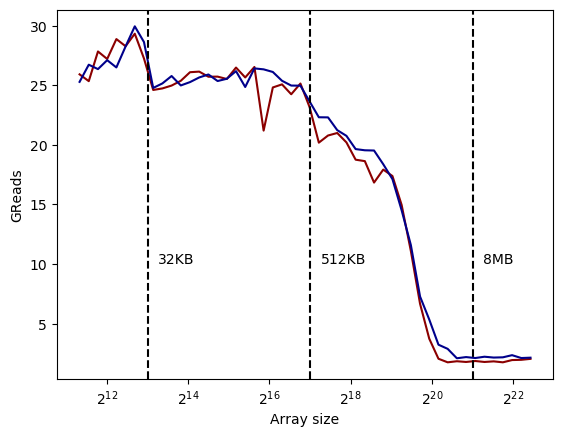

In [50]:
plt.xlabel('Array size')
plt.ylabel('GReads')

plt.plot(ns, p, color='darkred')
plt.plot(ns, l, color='darkblue')

lines = [
    (2**13, "32KB"),
    (2**17, "512KB"),
    (2**21, "8MB"),
]

for x, t in lines:
    plt.text(x * 1.2, 10, t)
    plt.axvline(x=x, color='black', linestyle='--')

plt.xscale('log', basex=2)

#plt.title("for(int i = 0; i < n; i++) a[i]++")

plt.show()
#plt.savefig("permutation.svg")